In [1]:
pip install imbalanced-learn --user
pip install --upgrade scikit-learn
#after installing, restart jupyter notebook!

SyntaxError: invalid syntax (<ipython-input-1-59cce793e132>, line 1)

In [15]:
pip install --upgrade --user scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\vveen\anaconda\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn

print(sklearn. __version__)

0.24.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Plotting data

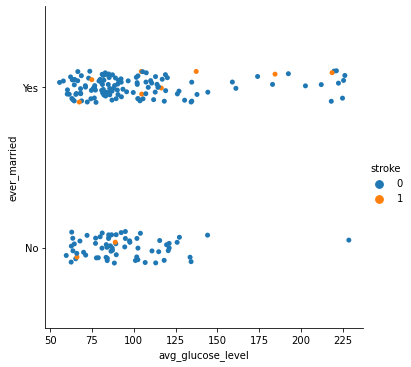

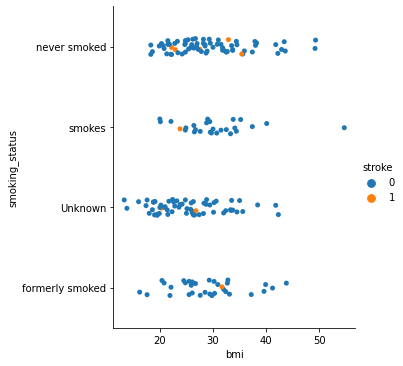

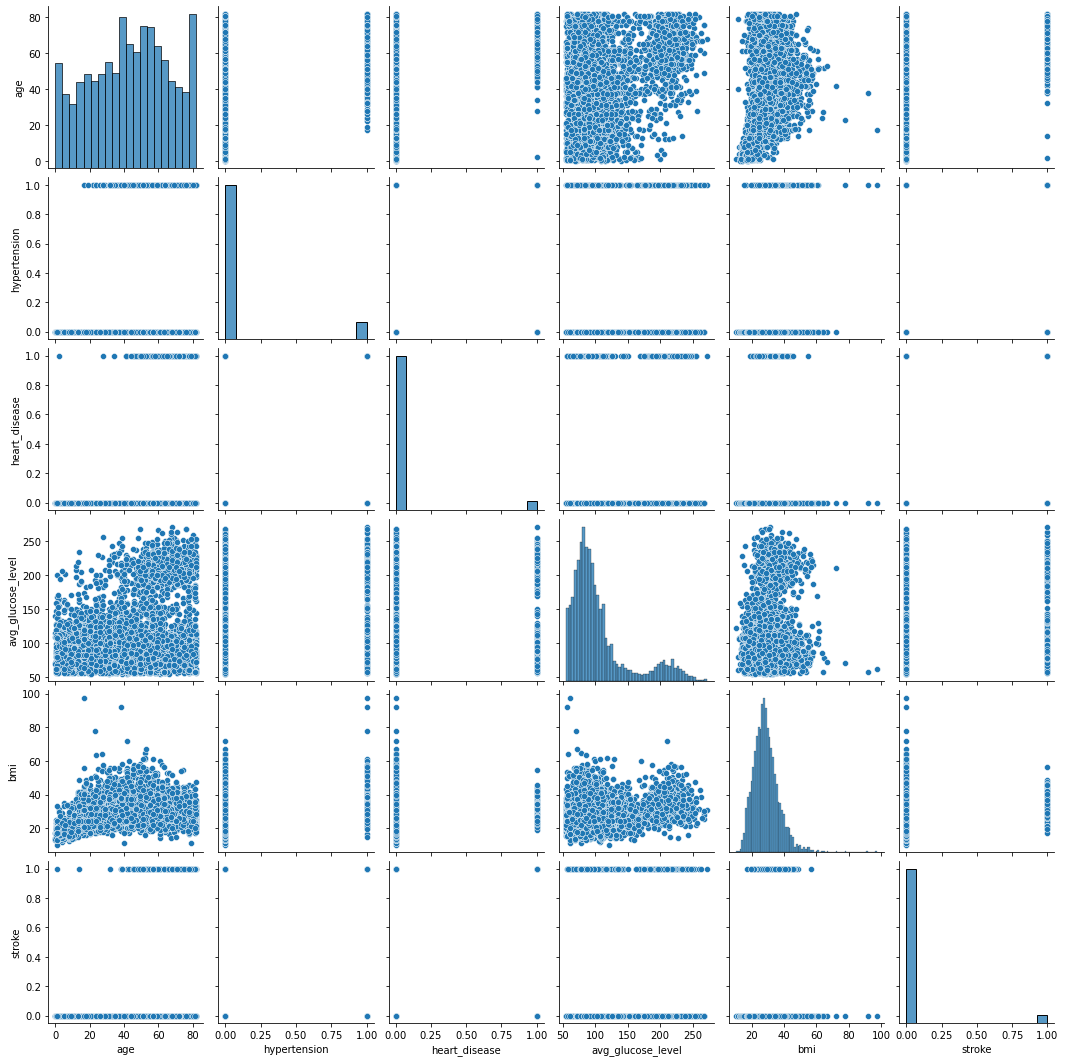

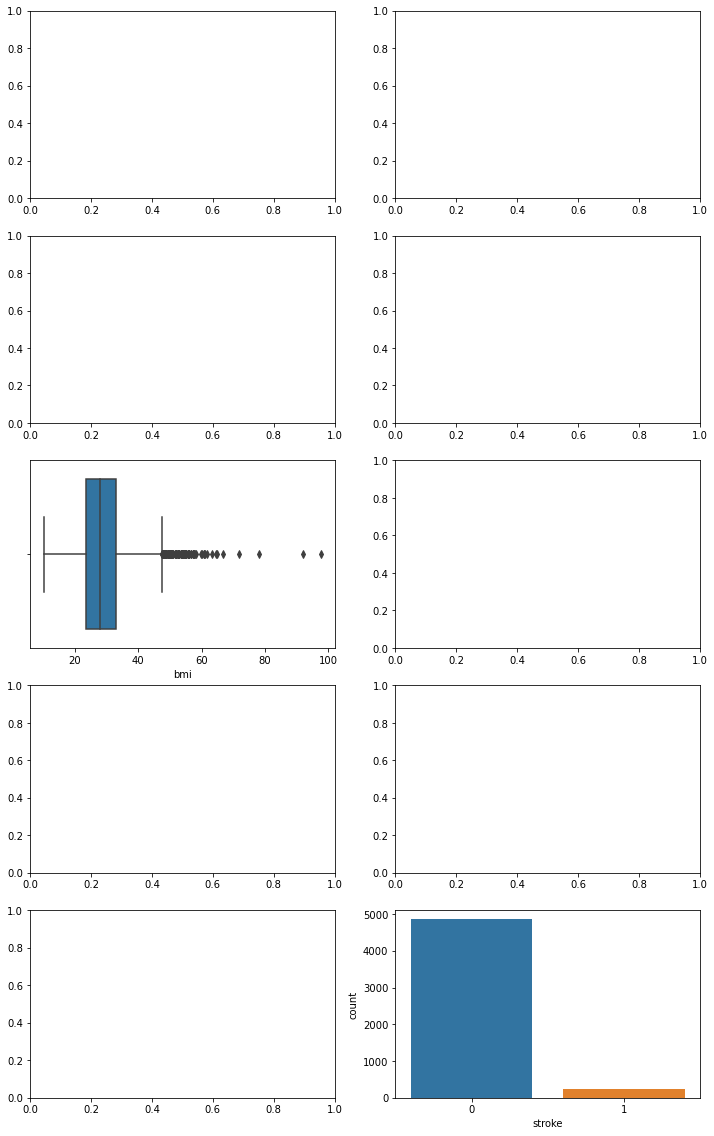

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data_sample = pd.read_csv("healthcare-dataset-stroke-data.csv").sample(200, random_state=44)


X = stroke_data.drop('stroke', axis=1).drop('id', axis=1)
y = stroke_data['stroke']


#PLOTTING TAKES A WHILE
a = sns.catplot(x="avg_glucose_level", y="ever_married", hue="stroke", data=stroke_data_sample)
a = sns.catplot(x="bmi", y="smoking_status", hue="stroke", data=stroke_data_sample)

data = stroke_data.drop('id', axis=1)
a2 = sns.pairplot(data)

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
box = sns.boxplot(x = 'bmi', data = stroke_data, ax=axes[2][0])


class_imbalance = sns.countplot(x = y, data = stroke_data)

##heatmap

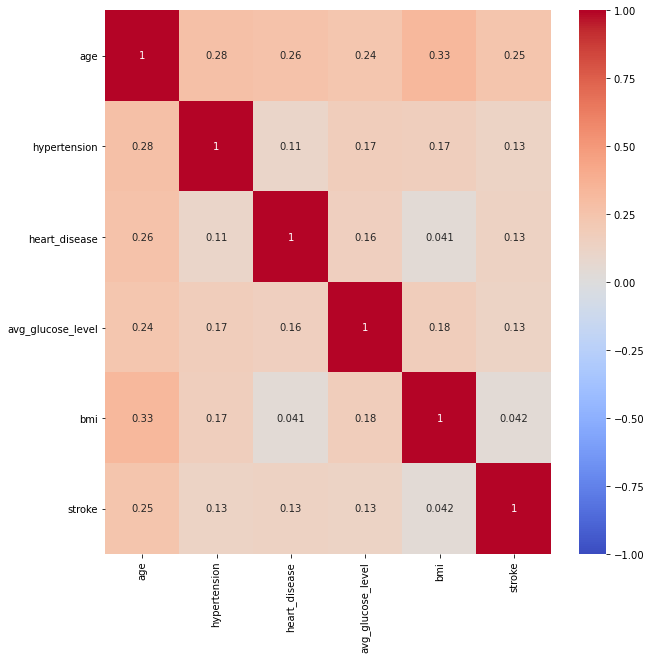

In [5]:
#Correlation
plt.figure(figsize=(10,10))
sns.heatmap(stroke_data.drop('id', axis=1).corr(), vmin=-1, cmap='coolwarm', annot=True);

# Importing data


In [6]:

#read file
dataset = pd.read_csv(r"healthcare-dataset-stroke-data.csv")



In [7]:

dataset['smoking_status'].replace('Unknown', np.nan, inplace=True)

#check for any missing values
dataset.isna().sum()


dataset['bmi'].fillna(dataset['bmi'].mean(), inplace=True)
dataset['smoking_status'].fillna(dataset['smoking_status'].mode()[0], inplace = True)

dataset.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

One-hot encoding for work-type/residence/smoking/m-f (This one is currently not used!)


# One-hot-encoder

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#gender
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))
#ever_married
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))
#work_type
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct3.fit_transform(X))
#Residence_type
ct4 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [13])], remainder='passthrough')
X = np.array(ct4.fit_transform(X))
#smoking_status
ct5 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17])], remainder='passthrough')
X = np.array(ct5.fit_transform(X))



# Spliting data: (use the training sets for cross validation etc  (: )

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
# first oversampling method. 
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()

# this is the second oversampling method. 
from imblearn.combine import SMOTEENN 
sm = SMOTEENN(random_state = 0)

#X_res, y_res = sm.fit_resample(X_train, y_train)
#print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
#print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

#print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
#print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

#print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))


## oversampling within each fold

In [12]:
# https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)
rf = RandomForestClassifier(n_estimators=100, random_state=13)
cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

    
example_params = {
        'n_estimators': 100,
        'max_depth': 5,
        'random_state': 13
    }

def score_model(model, params, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
    if cv is None:
        
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTE(random_state=42)
    
    scores = []

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = X_train[train_fold_index], y_train[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train[val_fold_index], y_train[val_fold_index]

        # Upsample only the data in the training section
        X_res, y_res = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
#         # Fit the model on the upsampled training data
#         model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
#         # Score the model on the (non-upsampled) validation data
#         score = recall_score(y_val_fold, model_obj.predict(X_val_fold))
#         scores.append(score)
#     return np.array(scores)

# # Example of the model in action
# score_model(RandomForestClassifier, example_params, cv=kf)

NameError: name 'kf' is not defined

# Scaling features (If needed: For now I used it!)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# The SVC classifier: Training

In [14]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              SVC())
cross_val_score(imba_pipeline, X_train, y_train, scoring='recall')


array([0.39473684, 0.39473684, 0.40540541, 0.48648649, 0.52631579])

In [15]:
from sklearn.model_selection import GridSearchCV 

params = {'svc__C': [0.1, 1, 10, 100, 1000],  
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'svc__kernel': ['rbf']}  
svcgrid = GridSearchCV(imba_pipeline, param_grid=params, refit = True, verbose = 3) 

svcgrid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ......svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   2.6s
[CV 2/5] END ......svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   2.9s
[CV 3/5] END ......svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   2.9s
[CV 4/5] END ......svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   2.8s
[CV 5/5] END ......svc__C=0.1, svc__gamma=1, svc__kernel=rbf; total time=   2.7s
[CV 1/5] END ....svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   1.8s
[CV 2/5] END ....svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   1.8s
[CV 3/5] END ....svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   2.1s
[CV 4/5] END ....svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   2.1s
[CV 5/5] END ....svc__C=0.1, svc__gamma=0.1, svc__kernel=rbf; total time=   2.1s
[CV 1/5] END ...svc__C=0.1, svc__gamma=0.01, svc__kernel=rbf; total time=   3.3s
[CV 2/5] END ...svc__C=0.1, svc__gamma=0.01, sv

[CV 2/5] END .....svc__C=1000, svc__gamma=1, svc__kernel=rbf; total time=   2.3s
[CV 3/5] END .....svc__C=1000, svc__gamma=1, svc__kernel=rbf; total time=   2.4s
[CV 4/5] END .....svc__C=1000, svc__gamma=1, svc__kernel=rbf; total time=   2.9s
[CV 5/5] END .....svc__C=1000, svc__gamma=1, svc__kernel=rbf; total time=   1.9s
[CV 1/5] END ...svc__C=1000, svc__gamma=0.1, svc__kernel=rbf; total time=   1.3s
[CV 2/5] END ...svc__C=1000, svc__gamma=0.1, svc__kernel=rbf; total time=   1.5s
[CV 3/5] END ...svc__C=1000, svc__gamma=0.1, svc__kernel=rbf; total time=   1.4s
[CV 4/5] END ...svc__C=1000, svc__gamma=0.1, svc__kernel=rbf; total time=   1.7s
[CV 5/5] END ...svc__C=1000, svc__gamma=0.1, svc__kernel=rbf; total time=   1.2s
[CV 1/5] END ..svc__C=1000, svc__gamma=0.01, svc__kernel=rbf; total time=   1.5s
[CV 2/5] END ..svc__C=1000, svc__gamma=0.01, svc__kernel=rbf; total time=   2.0s
[CV 3/5] END ..svc__C=1000, svc__gamma=0.01, svc__kernel=rbf; total time=   1.9s
[CV 4/5] END ..svc__C=1000, 

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['rbf']},
             verbose=3)

Some links that I used

In [16]:
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://scikit-learn.org/0.15/modules/cross_validation.html

# Cross validation for the best estimator of the SVC classifier

In [17]:


#These are the best hyperparameters found during gridsearch
print(svcgrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores = cross_val_score(svcgrid.best_estimator_, X_train, y_train, cv=5)
scores
scores.mean()


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('svc', SVC(C=1000, gamma=1))])


0.8940492441134118

Fit the model which we can use for testing

## results from SVC classifier

In [18]:
# All results
#means = svcgrid.cv_results_['mean_test_score']
#stds = svcgrid.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, svcgrid.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , svcgrid.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, labels=np.unique(y_pred))
#from sklearn.metrics import precision_score
#precision_score(y_test, y_pred, labels=np.unique(y_pred))
#from sklearn.metrics import recall_score
#recall_score(y_test, y_pred, labels=np.unique(y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


Results on the test set:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1217
           1       0.08      0.11      0.09        61

    accuracy                           0.90      1278
   macro avg       0.52      0.52      0.52      1278
weighted avg       0.91      0.90      0.90      1278



array([[1137,   80],
       [  54,    7]], dtype=int64)

In [20]:


#USED THIS ONE INSTEAD OF GRID SEARCH
    
smoteSVC = make_pipeline(SMOTE(random_state=42), SVC(C=1000, gamma=0.001, kernel='rbf'))
smoteSVC.fit(X_train, y_train)
y_true, y_pred = y_test , smoteKNN.predict(X_test)

#C=1000,gamma=0.001

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


from collections import Counter
Counter(y_train)
#Counter(y_test)
print(y_pred)
print(np.unique(y_pred))

#'svc__C': [0.1, 1, 10, 100, 1000],  
 #             'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],

NameError: name 'smoteKNN' is not defined

# KNN classifier: Training

In [32]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,41)

imba_pipeline_knn = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier())

param_grid_knn = {'kneighborsclassifier__n_neighbors': k_values,  
              'kneighborsclassifier__weights': ['uniform', 'distance']
              }  
knngrid = GridSearchCV(imba_pipeline_knn, param_grid_knn, refit = True, verbose = 3) 
knngrid.fit(X_train, y_train)




Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier_

[CV 1/5] END kneighborsclassifier__n_neighbors=8, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=8, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=8, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=8, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=8, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5] END kneighbors

[CV 2/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=16, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 1/5] END k

[CV 3/5] END kneighborsclassifier__n_neighbors=23, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=23, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=23, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=24, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=24, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=24, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=24, kneighborsclassifier__weights=uniform; total time=   0.1s
[CV 5/5] END kneighborsclassifier__n_neighbors=24, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=24, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5] END kn

[CV 3/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=uniform; total time=   0.1s
[CV 4/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=31, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=32, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 2/5] END k

[CV 4/5] END kneighborsclassifier__n_neighbors=38, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=38, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=39, kneighborsclassifier__weights=uniform; total time=   0.1s
[CV 2/5] END kneighborsclassifier__n_neighbors=39, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=39, kneighborsclassifier__weights=uniform; total time=   0.1s
[CV 4/5] END kneighborsclassifier__n_neighbors=39, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=39, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=39, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=39, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5] END kn

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 41),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=3)

In [33]:
# All results
means = knngrid.cv_results_['mean_test_score']
stds = knngrid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, knngrid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , knngrid.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))
print(knngrid.best_estimator_)

0.882 (+/-0.012) for {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
0.882 (+/-0.012) for {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'distance'}
0.891 (+/-0.011) for {'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__weights': 'uniform'}
0.882 (+/-0.012) for {'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__weights': 'distance'}
0.837 (+/-0.018) for {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}
0.847 (+/-0.019) for {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
0.849 (+/-0.017) for {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__weights': 'uniform'}
0.843 (+/-0.021) for {'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__weights': 'distance'}
0.811 (+/-0.015) for {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'uniform'}
0.828 (+/-0.015) for {'kneighborsclassifie

Results on the test set:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1217
           1       0.11      0.18      0.13        61

    accuracy                           0.89      1278
   macro avg       0.53      0.55      0.54      1278
weighted avg       0.92      0.89      0.90      1278

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])


# Cross validation for the best estimator of the KNN classifier

In [34]:
from sklearn.model_selection import cross_val_score

#These are the best hyperparameters found during gridsearch
print(knngrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores2 = cross_val_score(knngrid.best_estimator_, X_res, y_res, cv=5)
scores2
scores2.mean()

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])


NameError: name 'X_res' is not defined

Fit the model which we can use for testing

In [35]:
knngrid.best_estimator_.fit(X_res, y_res)

NameError: name 'X_res' is not defined

## knn visualization of different values for K

Text(0, 0.5, 'Mean Error')

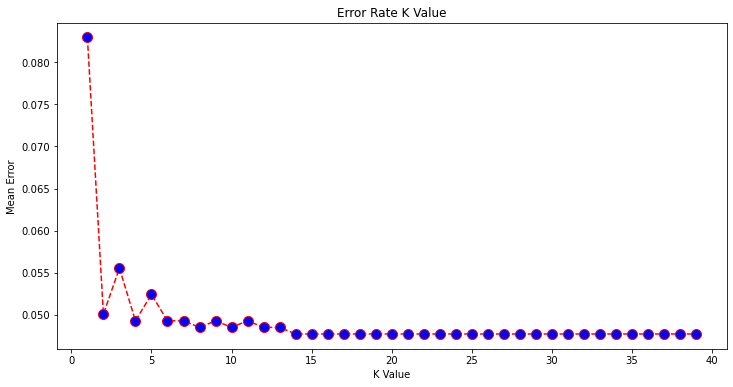

In [36]:
# resource: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Simple neural network - training and testing

In [64]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


0.88

## grid search for mlp classifier and results. 

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

imba_pipeline_mlp = make_pipeline(SMOTE(random_state=42), 
                              MLPClassifier())


parameter_space = {
    'mlpclassifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'mlpclassifier__activation': ['tanh', 'relu'],
    'mlpclassifier__solver': ['sgd', 'adam'],
    'mlpclassifier__alpha': [0.0001, 0.05],
    'mlpclassifier__learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(imba_pipeline_mlp, parameter_space, cv=3, refit = True, return_train_score=True, verbose = 3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))



Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=  11.5s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   6.9s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=  12.7s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  17.4s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  14.3s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  16.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  17.4s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  17.0s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  17.1s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  16.4s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  14.0s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  15.6s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclas

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  21.0s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  18.9s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  23.8s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  20.4s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  21.2s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  22.3s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  21.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  41.3s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  25.7s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=  10.5s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   9.0s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   8.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  11.5s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  11.0s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  10.4s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   8.1s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  11.5s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  10.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  10.5s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  10.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  10.9s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   9.0s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   4.6s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   9.0s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  17.7s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  15.1s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  17.3s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  16.7s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  17.9s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  18.4s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  18.4s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  17.8s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  12.2s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   7.6s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   5.9s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__s

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  22.0s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  22.4s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  19.1s
[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  19.3s
[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solve

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  12.3s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  11.2s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  10.7s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  10.7s
[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  10.1s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   9.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  10.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  10.9s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  11.3s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   8.3s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   8.0s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   7.9s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__sol

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  15.3s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  15.2s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  15.2s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   6.0s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  15.0s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  14.8s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclas

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  20.2s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  16.8s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  18.7s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  19.6s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  17.6s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   6.9s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  18.8s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  19.3s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   4.9s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   3.5s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   5.4s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=   9.8s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=   9.0s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=   9.4s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   9.0s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   9.2s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   8.4s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   7.3s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   8.7s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.0001, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   8.8s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   6.4s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   7.6s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=  11.1s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  15.9s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  10.2s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=   6.5s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  15.2s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  15.2s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  15.3s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  13.0s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  16.6s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 50, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  12.1s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   7.9s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=sgd; total time=   8.1s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__s

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  20.9s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=  12.5s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  17.7s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  16.8s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=  18.0s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   7.7s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  18.4s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(50, 100, 50), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=  15.4s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solve

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=   8.6s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=constant, mlpclassifier__solver=adam; total time=   6.6s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   6.3s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   8.4s
[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=sgd; total time=   6.7s
[CV 1/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   8.2s
[CV 2/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   6.4s


c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV 3/3] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(100,), mlpclassifier__learning_rate=adaptive, mlpclassifier__solver=adam; total time=   8.5s
Best parameters found:
 {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50, 100, 50), 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__solver': 'adam'}
0.701 (+/-0.011) for {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50, 50, 50), 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__solver': 'sgd'}
0.882 (+/-0.027) for {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50, 50, 50), 'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__solver': 'adam'}
0.695 (+/-0.036) for {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50, 50, 50)

In [77]:
print(clf.best_estimator_)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh',
                               hidden_layer_sizes=(50, 100, 50)))])


In [78]:
#links i used:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

## dummy classifier

In [30]:
import numpy as np
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
# y_true, y_pred = y_test , svcgrid.predict(X_test)


dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_test, y_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)



y_true, y_pred = y_test , svcgrid.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))


Results on the test set:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1217
           1       0.08      0.11      0.09        61

    accuracy                           0.90      1278
   macro avg       0.52      0.52      0.52      1278
weighted avg       0.91      0.90      0.90      1278

